Customers Data:
   CustomerID CustomerName         Region  SignupDate
0      C0001          Anu           Asia   1/15/2021
1      C0002          Bob         Europe  12/20/2020
2      C0003         Manu  North America   5/10/2019
3      C0004         Bavi           Asia   7/25/2021
4      C0005          Sam         Europe   3/18/2020
Products Data:
   ProductID ProductName     Category  Price
0      P001      Laptop  Electronics   1200
1      P002       Phone  Electronics    800
2      P003      Tablet  Electronics    300
3      P004     Monitor  Electronics    200
4      P005    Keyboard  Accessories     50
Transactions Data:
   TransactionID CustomerID ProductID TransactionDate  Quantity  TotalValue  \
0          T001      C0001      P001      2023-01-10         1        1200   
1          T002      C0002      P002      2023-01-12         2        1600   
2          T003      C0003      P003      2023-01-15         1         300   
3          T004      C0004      P004      2023-01-18 

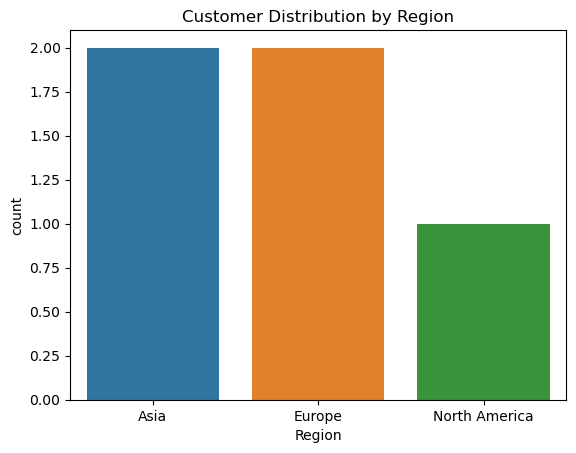

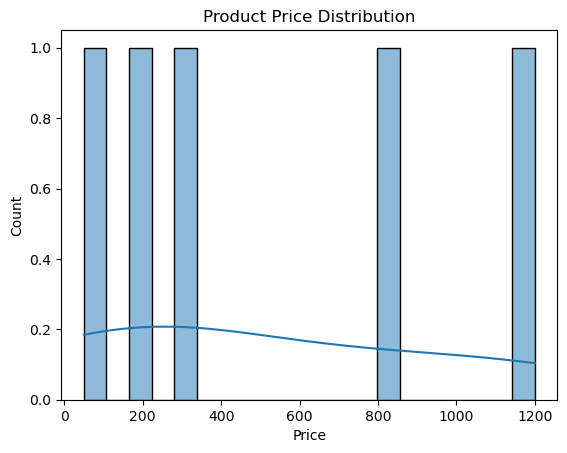

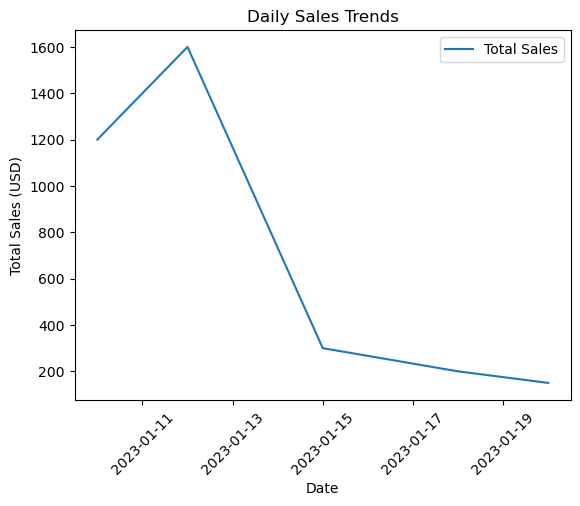

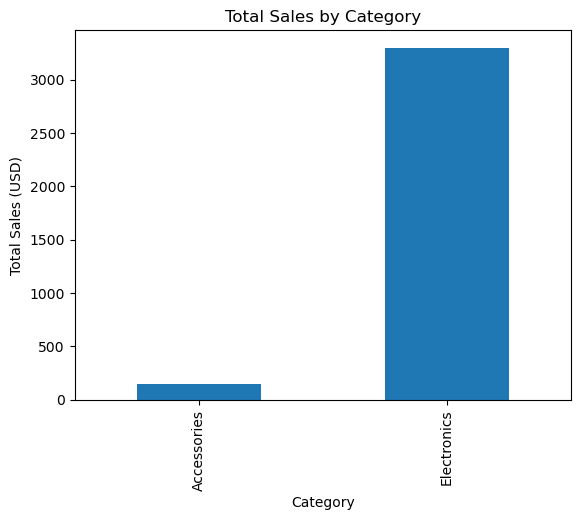

Columns in merged_data:
 Index(['TransactionID', 'CustomerID', 'ProductID', 'TransactionDate',
       'Quantity', 'TotalValue', 'Price_x', 'CustomerName', 'Region',
       'SignupDate', 'ProductName', 'Category', 'Price_y'],
      dtype='object')
            TotalSpent  TransactionCount  AvgPrice
CustomerID                                        
C0001             1200                 1    1200.0
C0002             1600                 1     800.0
C0003              300                 1     300.0
C0004              200                 1     200.0
C0005              150                 1      50.0


In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import davies_bouldin_score

#Task1
customers = pd.read_csv("C:/Users/dell/Downloads/Customerss.csv")
products = pd.read_csv("C:/Users/dell/Downloads/Products.csv")
transactions = pd.read_csv("C:/Users/dell/Downloads/Transactions.csv")


print("Customers Data:\n", customers.head())
print("Products Data:\n", products.head())
print("Transactions Data:\n", transactions.head())

# Task2
print("Missing values in Customers:", customers.isnull().sum())
print("Missing values in Products:", products.isnull().sum())
print("Missing values in Transactions:", transactions.isnull().sum())


customers['SignupDate'] = pd.to_datetime(customers['SignupDate'])
transactions['TransactionDate'] = pd.to_datetime(transactions['TransactionDate'])


sns.countplot(data=customers, x='Region')
plt.title("Customer Distribution by Region")
plt.show()


sns.histplot(products['Price'], kde=True, bins=20)
plt.title("Product Price Distribution")
plt.show()


daily_sales = transactions.groupby(transactions['TransactionDate'].dt.date)['TotalValue'].sum()
plt.plot(daily_sales, label="Total Sales")
plt.title("Daily Sales Trends")
plt.xlabel("Date")
plt.ylabel("Total Sales (USD)")
plt.xticks(rotation=45)
plt.legend()
plt.show()


top_products = transactions.merge(products, on="ProductID").groupby("Category")['TotalValue'].sum()
top_products.plot(kind="bar", title="Total Sales by Category")
plt.ylabel("Total Sales (USD)")
plt.show()

# Task 3
merged_data = transactions.merge(customers, on='CustomerID').merge(products, on='ProductID')


print("Columns in merged_data:\n", merged_data.columns)


if 'Price_x' in merged_data.columns:
    merged_data.rename(columns={'Price_x': 'Price'}, inplace=True)
elif 'Price_y' in merged_data.columns:
    merged_data.rename(columns={'Price_y': 'Price'}, inplace=True)


customer_features = merged_data.groupby("CustomerID").agg({
    "TotalValue": "sum",
    "TransactionID": "count",
    "Price": "mean"  
}).rename(columns={
    "TotalValue": "TotalSpent",
    "TransactionID": "TransactionCount",
    "Price": "AvgPrice"
})


print(customer_features.head())
